In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam 

### Load and preprocess data

In [15]:

file_path = "C:/Users/HP/Downloads/stocks.csv"  
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

### Filter for one stock (e.g., AAPL) & Plot the data

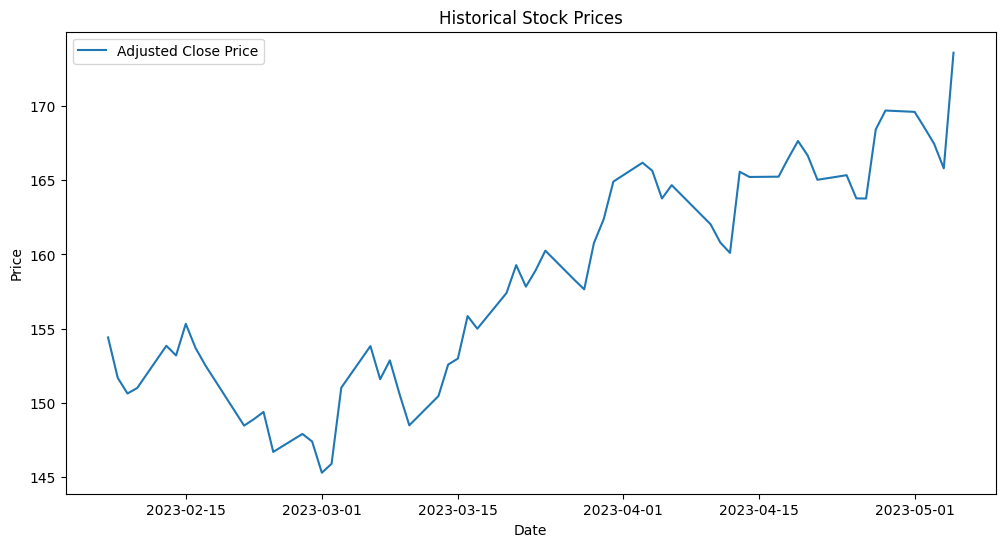

In [16]:

data = data[data['Ticker'] == 'AAPL']['Adj Close']


plt.figure(figsize=(12, 6))
plt.plot(data, label='Adjusted Close Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Training  ARIMA model & Forecast 

Training ARIMA model...
                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -132.404
Date:                Sun, 29 Dec 2024   AIC                            276.809
Time:                        21:38:36   BIC                            289.474
Sample:                             0   HQIC                           281.772
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0116      0.178     -0.065      0.948      -0.361       0.337
ar.L2         -0.1492      0.173     -0.864      0.388      -0.488       0.189
ar.L3         -0.0674      0

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer

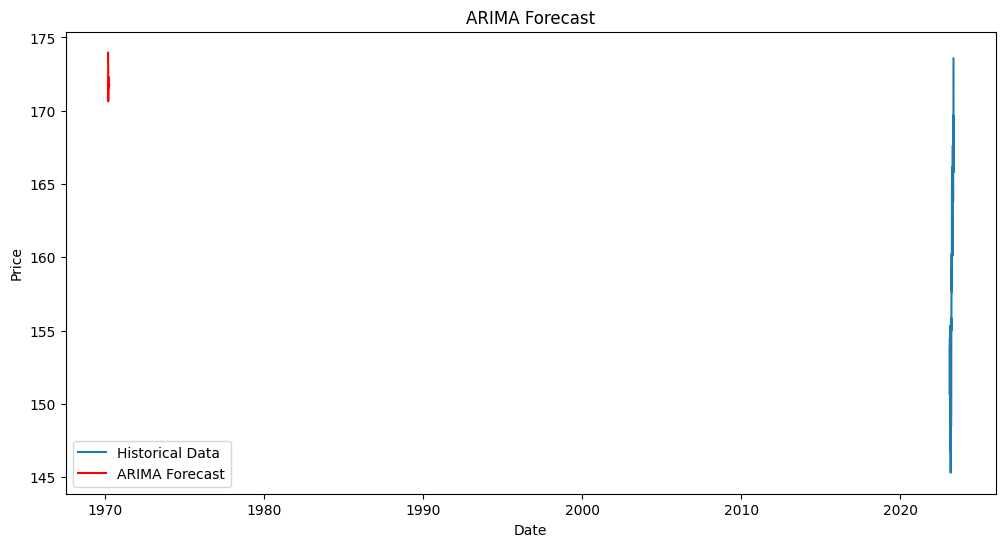

In [17]:
 
print("Training ARIMA model...")
arima_model = ARIMA(data, order=(5, 1, 0))  # Adjust p, d, q as needed
arima_result = arima_model.fit()
print(arima_result.summary())

forecast = arima_result.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(data, label='Historical Data')
plt.plot(forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### LSTM Model , Predictions & Plot LSTM results

Preparing data for LSTM...
Training LSTM model...


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0819
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0251
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0124
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0142
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0174
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0166
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0169
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0153
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0110
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0222
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 848ms/step


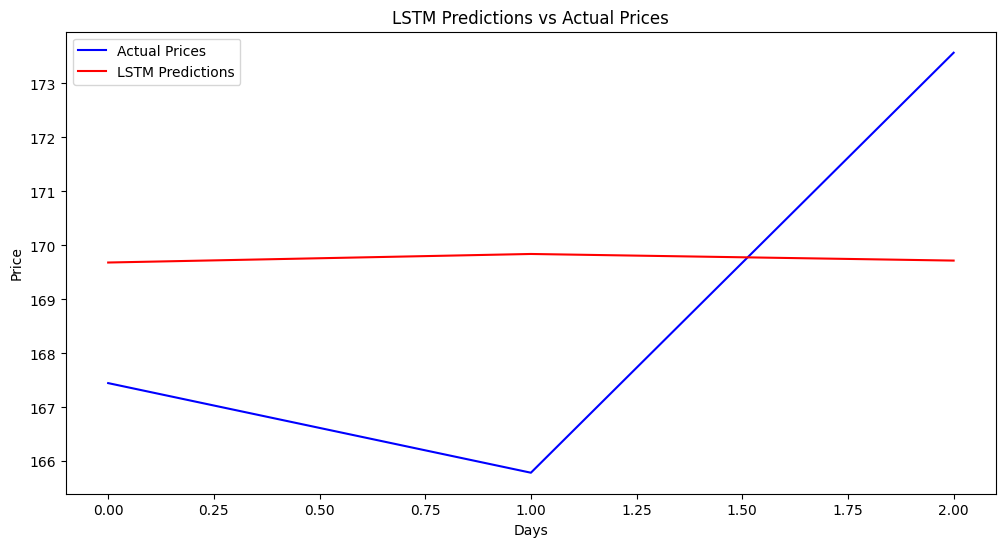

In [18]:

print("Preparing data for LSTM...")
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

look_back = 10  

# training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Validate shapes of training and test sets
assert X_train.size > 0, "X_train is empty. Check your dataset or look_back value."
assert X_test.size > 0, "X_test is empty. Check your dataset or look_back value."

# Reshape inputs for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
print("Training LSTM model...")
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=10)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label='Actual Prices', color='blue')
plt.plot(predictions, label='LSTM Predictions', color='red')
plt.title('LSTM Predictions vs Actual Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()